<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module5/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multi-Layer Perceptron (MLP)**
A **Multi-Layer Perceptron (MLP)** is a type of **artificial neural network (ANN)** composed of multiple layers of neurons. It is commonly used for classification and regression tasks.

---

### **1. Architecture of MLP**
An MLP consists of:
- **Input Layer:** Accepts feature vectors as input.
- **One or More Hidden Layers:** Each hidden layer applies a linear transformation followed by a non-linear activation function.
- **Output Layer:** Produces the final predictions.

A fully connected MLP with one hidden layer can be represented mathematically as:

$$
z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]}
$$

$$
a^{[l]} = f(z^{[l]})
$$

where:
- $ W^{[l]} $ is the **weight matrix** connecting layer $ l-1 $ to layer $ l $.
- $ b^{[l]} $ is the **bias vector**.
- $ a^{[l]} $ is the **activation output**.
- $ f(\cdot) $ is the **activation function** (e.g., ReLU, Sigmoid).

---

### **2. Activation Functions**
Activation functions introduce non-linearity, allowing MLPs to learn complex patterns.

| Activation Function | Formula | Use Case |
|----------------------|--------------------------------|----------------|
| **Sigmoid** | $f(x)$ = $\frac{1}{1 + e^{-x}}$ | Binary classification |
| **ReLU** | $f(x)$ = $\max$$(0, x)$ | Hidden layers (faster training) |
| **Tanh** | $f(x)$ = $\frac{e^x - e^{-x}}{e^x + e^{-x}}$ | Centered around 0, useful for deep networks |
| **Softmax** | $f(x)_i$ = $\frac{e^{x_i}}{\sum_j e^{x_j}}$ | Multi-class classification |

---

### **3. Forward Propagation**
During forward propagation:
1. Input passes through each layer.
2. Each layer applies a linear transformation followed by an activation function.
3. The output layer produces the final prediction.

For a **3-layer MLP** with **1 hidden layer**, forward propagation follows:

$$
z^{[1]} = W^{[1]} X + b^{[1]}
$$

$$
a^{[1]} = f(z^{[1]})
$$

$$
z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}
$$

$$
\hat{y} = f(z^{[2]})
$$

where:
- $ X $ is the input.
- $ \hat{y} $ is the predicted output.

---

### **4. Backpropagation and Optimization**
MLPs learn by minimizing a **loss function** using **gradient descent** via **backpropagation**:
- Compute loss $ L(\hat{y}, y) $.
- Compute gradients using **chain rule**.
- Update weights using **Stochastic Gradient Descent (SGD)**:

$$
W = W - \eta \frac{\partial L}{\partial W}
$$

where $ \eta $ is the learning rate.

Popular optimizers:
- **SGD** (Stochastic Gradient Descent)
- **Adam** (Adaptive Moment Estimation)
- **RMSprop** (Root Mean Square Propagation)




#Auto_MPG_data

##Setup

In [1]:
! gdown --id 1qiUDDoYyRLBiKOoYWdFl_5WByHE8Cugu

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qiUDDoYyRLBiKOoYWdFl_5WByHE8Cugu
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 37.4MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
random_state = 59
np.random.seed(random_state)
torch.manual_seed(random_state)
if torch.cuda.is_available() :
  torch.cuda.manual_seed(random_state)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

##Data

###Load data

In [5]:
df = pd.read_csv('Auto_MPG_data.csv')

df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


###Split X, y

In [6]:
X = df.drop(columns = ['MPG']).values
y = df['MPG'].values

X

array([[  8., 307., 130., ...,   0.,   0.,   1.],
       [  8., 350., 165., ...,   0.,   0.,   1.],
       [  8., 318., 150., ...,   0.,   0.,   1.],
       ...,
       [  4., 135.,  84., ...,   0.,   0.,   1.],
       [  4., 120.,  79., ...,   0.,   0.,   1.],
       [  4., 119.,  82., ...,   0.,   0.,   1.]])

###Split train, val and test

In [7]:
val_size = 0.2
test_size = 0.125
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = val_size,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    shuffle = is_shuffle
)

###Normalize the data

In [8]:
normalizer = StandardScaler()

X_train = normalizer.fit_transform(X_train)
X_val = normalizer.transform(X_val)
X_test = normalizer.transform(X_test)

###Convert to tensor

In [9]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)

X_val = torch.tensor(X_val, dtype = torch.float32)
y_val = torch.tensor(y_val, dtype = torch.float32)

X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

###Build custom Dataset class

In [10]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [11]:
batch_size = 32
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset,
                          batch_size = batch_size,
                          shuffle = True)
val_loader = DataLoader(val_dataset,
                        batch_size = batch_size,
                        shuffle = False)

##Build Model

###Build Model class

In [12]:
class MLP(nn.Module):
  def __init__(self, input_dims , hidden_dims , output_dims):
    super().__init__()
    self.linear1 = nn.Linear(input_dims, hidden_dims)
    self.linear2 = nn.Linear(hidden_dims, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)

  def forward(self, x):
    x = self.linear1(x)
    x = F.relu(x)
    x = self.linear2(x)
    x = F.relu(x)
    out = self.output(x)
    return out.squeeze(1)

###Init model

In [13]:
input_dims = X_train.shape[1]
output_dims = 1
hidden_dims = 64

model = MLP (input_dims = input_dims,
             hidden_dims = hidden_dims,
             output_dims = output_dims).to(device)

###Define lr, loss and optimizer

In [14]:
lr = 1e-2
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

###Evaluate by R2

In [15]:
def r_squared(y_true, y_pred):
  y_true = torch.Tensor(y_true).to(device)
  y_pred = torch.Tensor(y_pred).to(device)
  mean_true = torch.mean(y_true)
  ss_res = torch.sum((y_true - y_pred)**2)
  ss_tot = torch.sum((y_true - mean_true)**2)
  r2 = 1 - ( ss_res / ss_tot )
  return r2.cpu().detach().numpy()

##Train model

In [16]:
epochs = 100
train_losses = []
val_losses = []
train_r2 = []
val_r2 = []

In [17]:
for epoch in range(epochs):
  train_loss = 0
  train_target = []
  train_predict = []
  val_target = []
  val_predict = []
  for X_samples, y_samples in train_loader:
    X_samples = X_samples.to(device)
    y_samples = y_samples.to(device)

    optimizer.zero_grad()
    outputs = model(X_samples)
    loss = criterion(outputs, y_samples)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    train_target += y_samples.tolist()
    train_predict += outputs.tolist()

  train_loss = train_loss / len(train_loader)
  train_losses.append(train_loss)
  train_r2.append(r_squared(train_target, train_predict))

  #Valididate
  model.eval()
  val_loss = 0.0
  with torch.no_grad():
    for X_samples, y_samples in val_loader:
      X_samples = X_samples.to(device)
      y_samples = y_samples.to(device)

      outputs = model(X_samples)
      loss = criterion(outputs, y_samples)

      val_loss += loss.item()
      val_target += y_samples.tolist()
      val_predict += outputs.tolist()

  val_loss = val_loss / len(val_loader)
  val_losses.append(val_loss)
  val_r2.append(r_squared(val_target, val_predict))
  print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_loss :.3f} \tValidation loss : {val_loss :.3f}')


EPOCH 1:	Training loss: 301.327 	Validation loss : 552.065

EPOCH 2:	Training loss: 339.867 	Validation loss : 390.276

EPOCH 3:	Training loss: 137.645 	Validation loss : 119.592

EPOCH 4:	Training loss: 68.875 	Validation loss : 16.040

EPOCH 5:	Training loss: 20.056 	Validation loss : 12.192

EPOCH 6:	Training loss: 15.418 	Validation loss : 114.436

EPOCH 7:	Training loss: 43.813 	Validation loss : 13.907

EPOCH 8:	Training loss: 16.684 	Validation loss : 9.963

EPOCH 9:	Training loss: 12.470 	Validation loss : 26.884

EPOCH 10:	Training loss: 11.821 	Validation loss : 6.104

EPOCH 11:	Training loss: 8.200 	Validation loss : 7.497

EPOCH 12:	Training loss: 7.118 	Validation loss : 7.597

EPOCH 13:	Training loss: 9.715 	Validation loss : 20.825

EPOCH 14:	Training loss: 16.930 	Validation loss : 8.075

EPOCH 15:	Training loss: 7.737 	Validation loss : 10.945

EPOCH 16:	Training loss: 9.193 	Validation loss : 8.228

EPOCH 17:	Training loss: 6.663 	Validation loss : 5.162

EPOCH 18:	T

##Visualize

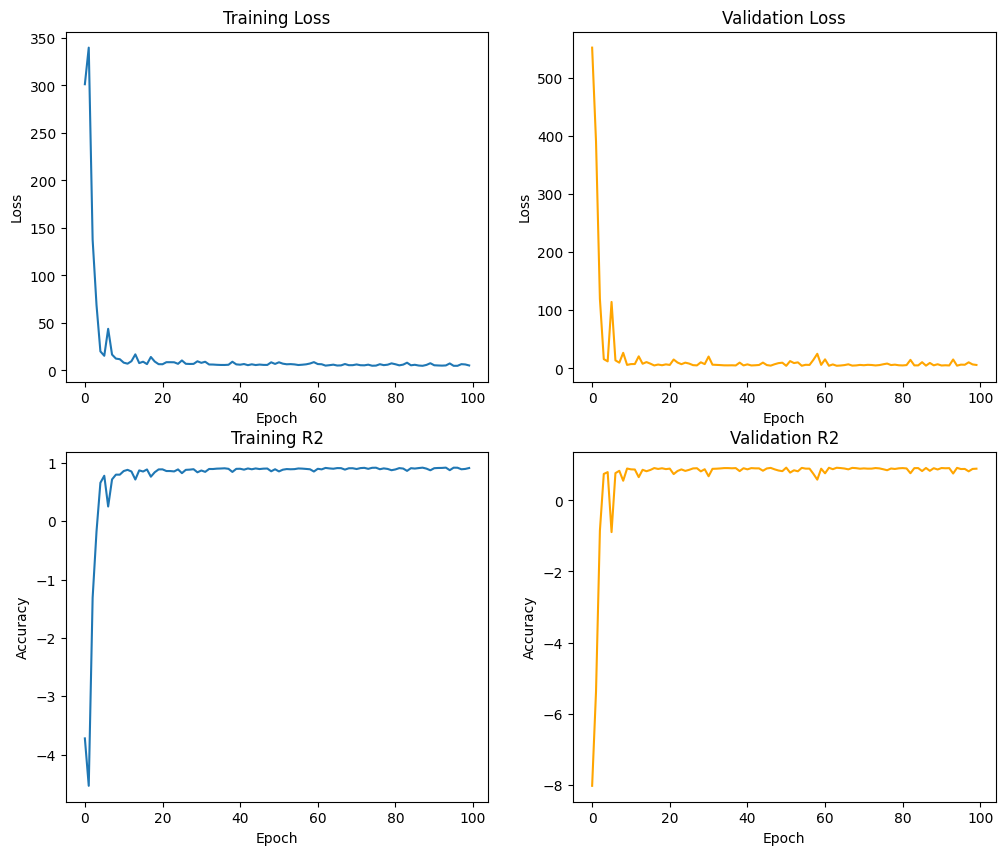

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel ='Epoch', ylabel = 'Loss')
ax[0, 0].set_title ('Training Loss')

ax[0, 1].plot (val_losses, 'orange')
ax[0, 1].set ( xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title ('Validation Loss')

ax[1, 0].plot ( train_r2 )
ax[1, 0].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title ('Training R2')

ax[1, 1].plot (val_r2, 'orange')
ax[1, 1].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title ('Validation R2')

plt.show()

##Evaluate

In [19]:
model.eval()
with torch.no_grad():
  y_hat = model(X_test.to(device))
  test_set_r2 = r_squared(y_hat, y_test)
  print('Evaluation on test set :')
  print(f'R2: { test_set_r2 }')

Evaluation on test set :
R2: 0.8083164691925049


#Non-linear data

##Setup

In [20]:
! gdown --id 1SqSn_8rxkk-Qvu4JLMcN_3ZFGDNa6P_V

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SqSn_8rxkk-Qvu4JLMcN_3ZFGDNa6P_V
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 14.5MB/s]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset , DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
device = torch.device ('cuda:0' if torch.cuda.is_available () else 'cpu')

device

device(type='cuda', index=0)

In [23]:
random_state = 59
np.random.seed (random_state)
torch.manual_seed(random_state)
if torch.cuda.is_available () :
  torch.cuda.manual_seed(random_state)

##Data

###Load data

In [24]:
data = np.load('NonLinear_data.npy', allow_pickle = True).item()

In [25]:
X, y = data['X'], data['labels']

print(X.shape)
print(y.shape)

(300, 2)
(300,)


###Split into train, val, test

In [26]:
val_size = 0.2
test_size = 0.125
shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = val_size,
    shuffle = shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    shuffle = shuffle
)

###Normalize data

In [27]:
normalizer = StandardScaler()

X_train = normalizer.fit_transform(X_train)
X_val = normalizer.transform(X_val)
X_test = normalizer.transform(X_test)

###Change to tensor

In [28]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.long)

X_val = torch.tensor(X_val, dtype = torch.float32)
y_val = torch.tensor(y_val, dtype = torch.long)

X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.long)

###Build Custom Dataloader

In [29]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [30]:
batch_size = 32
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset,
                          batch_size = batch_size,
                          shuffle = True)
val_loader = DataLoader(val_dataset,
                        batch_size = batch_size,
                        shuffle = False)
test_loader = DataLoader(test_dataset,
                         batch_size = batch_size,
                         shuffle = False)

##Build Model

###Build Model class

In [31]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims):
    super().__init__()
    self.linear1 = nn.Linear(input_dims, hidden_dims)
    self.output = nn. Linear(hidden_dims, output_dims)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu(x)
    out = self.output(x)
    return out

###Init model

In [32]:
input_dims = X_train.shape[1]
output_dims = torch.unique(y_train).shape[0]
hidden_dims = 128

model = MLP(input_dims = input_dims,
            hidden_dims = hidden_dims,
            output_dims = output_dims).to(device)

###Define loss, lr

In [33]:
lr = 1e-1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

###Build accuracy function

In [34]:
def accuracy(y_true, y_pred):
  _, y_hat = torch.max(y_pred, dim =1)
  correct = (y_hat == y_true).sum().item()
  acc = correct/len(y_true)
  return acc

##Train model

In [35]:
epochs = 100
train_losses = []
val_losses = []
train_accs = []
val_accs = []

In [36]:
for epoch in range(epochs):
  train_loss = 0.0
  train_target = []
  train_predict = []
  val_target = []
  val_predict = []
  for X_samples, y_samples in train_loader:
    X_samples = X_samples.to(device)
    y_samples = y_samples.to(device)
    optimizer.zero_grad()
    outputs = model(X_samples)
    loss = criterion(outputs, y_samples)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    train_predict.append(outputs.detach().cpu())
    train_target.append( y_samples.cpu())

  train_predict = torch.cat(train_predict)
  train_target = torch.cat(train_target)
  train_loss = train_loss / len(train_loader)
  train_losses.append(train_loss)
  train_acc = accuracy(train_target, train_predict)
  train_accs.append(train_acc)

  model.eval()
  val_loss = 0.0
  with torch.no_grad():
    for X_samples, y_samples in val_loader:
      X_samples = X_samples.to(device)
      y_samples = y_samples.to(device)
      outputs = model(X_samples)
      loss = criterion(outputs, y_samples)
      val_loss += loss.item()
      val_predict.append(outputs.detach().cpu())
      val_target.append(y_samples.cpu())

  val_loss = val_loss / len(val_loader)
  val_losses.append(val_loss)
  val_predict = torch.cat(val_predict)
  val_target = torch.cat(val_target)
  val_acc = accuracy(val_target, val_predict)
  val_accs.append(val_acc)
  print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_loss :.3f} \tValidation loss : {val_loss :.3f}')


EPOCH 1:	Training loss: 0.942 	Validation loss : 0.868

EPOCH 2:	Training loss: 0.774 	Validation loss : 0.821

EPOCH 3:	Training loss: 0.722 	Validation loss : 0.800

EPOCH 4:	Training loss: 0.683 	Validation loss : 0.794

EPOCH 5:	Training loss: 0.684 	Validation loss : 0.753

EPOCH 6:	Training loss: 0.659 	Validation loss : 0.736

EPOCH 7:	Training loss: 0.640 	Validation loss : 0.731

EPOCH 8:	Training loss: 0.631 	Validation loss : 0.695

EPOCH 9:	Training loss: 0.608 	Validation loss : 0.685

EPOCH 10:	Training loss: 0.588 	Validation loss : 0.695

EPOCH 11:	Training loss: 0.600 	Validation loss : 0.653

EPOCH 12:	Training loss: 0.582 	Validation loss : 0.638

EPOCH 13:	Training loss: 0.566 	Validation loss : 0.621

EPOCH 14:	Training loss: 0.544 	Validation loss : 0.600

EPOCH 15:	Training loss: 0.522 	Validation loss : 0.593

EPOCH 16:	Training loss: 0.533 	Validation loss : 0.591

EPOCH 17:	Training loss: 0.510 	Validation loss : 0.561

EPOCH 18:	Training loss: 0.511 	Validat

##Visualize

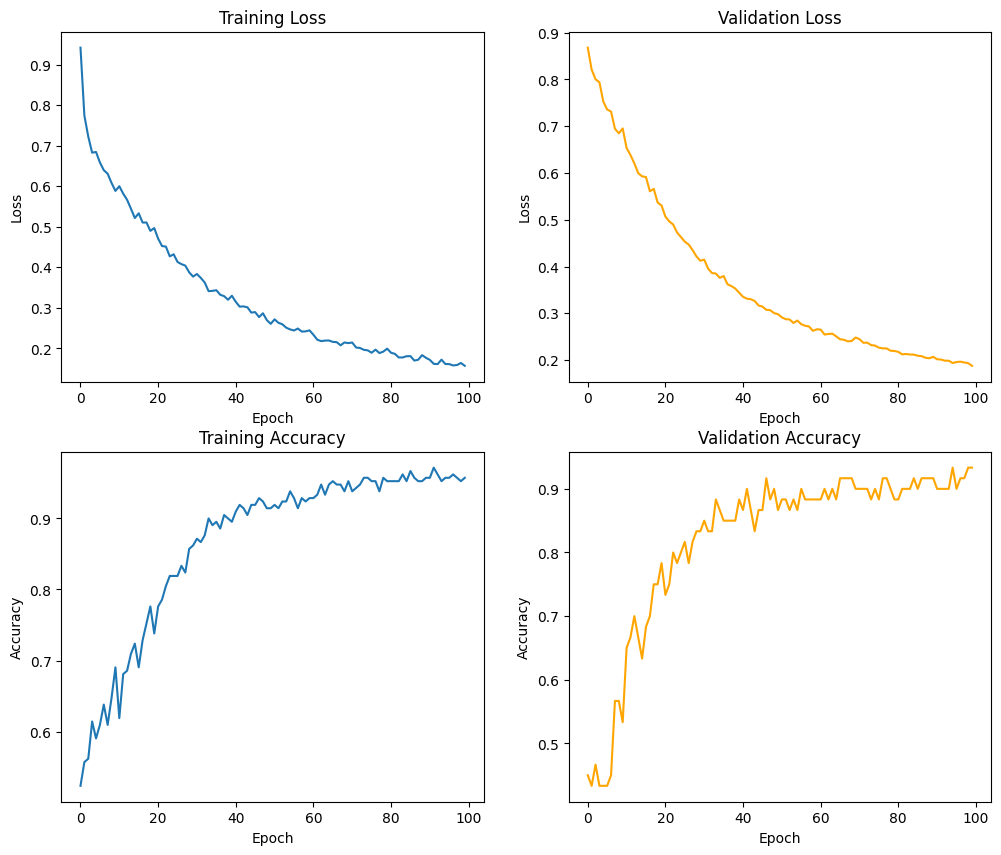

In [37]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel ='Epoch', ylabel = 'Loss')
ax[0, 0].set_title ('Training Loss')

ax[0, 1].plot (val_losses, 'orange')
ax[0, 1].set ( xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title ('Validation Loss')

ax[1, 0].plot ( train_accs )
ax[1, 0].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title ('Training Accuracy')

ax[1, 1].plot (val_accs, 'orange')
ax[1, 1].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title ('Validation Accuracy')

plt.show()

##Evaluate

In [38]:
test_target = []
test_predict = []
model.eval()

with torch.no_grad():
  for X_samples, y_samples in test_loader:
    X_samples = X_samples.to(device)
    y_samples = y_samples.to(device)
    outputs = model(X_samples)

    test_predict.append(outputs.cpu())
    test_target.append (y_samples.cpu())

test_predict = torch.cat(test_predict)
test_target = torch.cat(test_target)
test_acc = accuracy(test_target, test_predict)
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9333333333333333


#Emotion classification

##Setup

In [39]:
! gdown --id 1GaTMURqIQTjtalbNVAyVgPIEis21A0r8

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GaTMURqIQTjtalbNVAyVgPIEis21A0r8
From (redirected): https://drive.google.com/uc?id=1GaTMURqIQTjtalbNVAyVgPIEis21A0r8&confirm=t&uuid=4f7d8c0d-d8e6-4d8f-991a-ac49c7e84479
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:02<00:00, 22.2MB/s]


In [40]:
! unzip -q './FER-2013.zip'

In [42]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Resize
from torchvision.io import read_image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
device = torch.device ('cuda:0' if torch.cuda.is_available () else 'cpu')

device

device(type='cuda', index=0)

In [44]:
random_state = 59
np.random.seed (random_state)
torch.manual_seed(random_state)
if torch.cuda.is_available () :
  torch.cuda.manual_seed(random_state)

##Data

###Load data

In [45]:
train_dir = './train'
test_dir = './test'

classes = os.listdir(train_dir)

label2idx = {cls:idx for idx, cls in enumerate(classes)}
idx2label = {idx:cls for cls,idx in label2idx.items()}

In [49]:
test_img_path = './train/angry/Training_10118481.jpg'

img = cv2.imread (test_img_path)
img_height, img_width = (128, 128)

print(f'Image height: {img_height}')
print(f'Image width: {img_width}')

Image height: 128
Image width: 128


###Build custom dataset class

In [48]:
class ImageDataset(Dataset):
  def __init__(self, img_dir, norm, label2idx,
               split = 'train', train_ratio = 0.8):
    self.resize = Resize((img_height , img_width ))
    self.norm = norm
    self.img_dir = img_dir
    self.label2idx = label2idx
    self.split = split
    self.train_ratio = train_ratio
    self.img_paths, self.img_labels = self.read_img_files()

    if split in ['train', 'val'] and 'train' in img_dir.lower():
      train_data, val_data = train_test_split(
          list(zip(self.img_paths, self.img_labels)),
          train_size = self.train_ratio,
          random_state = random_state,
          stratify = self.img_labels
      )

      if split == 'train':
        self.img_paths, self.img_labels = zip(*train_data)

      if split == 'val':
        self.img_paths, self.img_labels = zip(*val_data)


  def read_img_files(self):
    img_paths = []
    img_labels = []
    for cls in self.label2idx.keys():
      for img in os.listdir(os.path.join(self.img_dir,cls)):
        image_path = os.path.join(self.img_dir, cls, img)
        img_paths.append(image_path)
        img_labels.append(cls)
    return img_paths, img_labels

  def __len__(self):
    return len(self.img_paths)

  def __getitem__(self, idx):
    img_path = self.img_paths[idx]
    cls = self.img_labels[idx]
    img = self.resize(read_image(img_path))
    img = img.type(torch.float32)
    label = self.label2idx[cls]
    if self.norm:
      img = (img /127.5) - 1
    return img, label

###Build train, val, test dataset

In [51]:
batch_size = 256

train_dataset = ImageDataset(img_dir = train_dir,
                            norm = True,
                            label2idx = label2idx,
                            split = 'train')

train_loader = DataLoader(train_dataset,
                          batch_size = batch_size,
                          shuffle = True)

val_dataset = ImageDataset(img_dir = train_dir,
                            norm = True,
                            label2idx = label2idx,
                            split = 'val')

val_loader = DataLoader(val_dataset,
                        batch_size = batch_size,
                        shuffle = False)

test_dataset = ImageDataset(img_dir = test_dir,
                            norm = True,
                            label2idx = label2idx,
                            split = 'test')

test_loader = DataLoader(test_dataset,
                         batch_size = batch_size,
                         shuffle = False)

###Visualize images

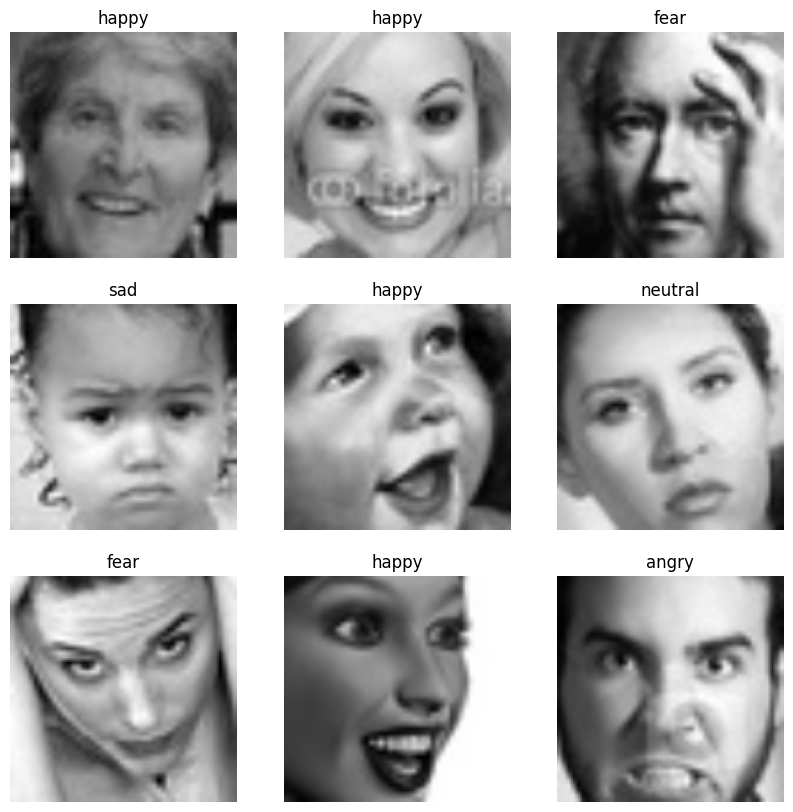

In [52]:
image_batch, label_batch = next(iter(train_loader))

plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot (3 , 3 , i + 1)
  minv = image_batch[i].numpy().min()
  maxv = image_batch[i].numpy().max()
  plt.imshow (np.squeeze(image_batch[i].numpy()),
                vmin = minv,
                vmax = maxv,
                cmap = "gray")
  label = label_batch[i]
  plt.title(idx2label[label.item()])
  plt.axis("off")

##Model

###Build model class

In [53]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims):
    super(MLP, self).__init__()
    self.linear1 = nn.Linear(input_dims, hidden_dims*4)
    self.linear2 = nn.Linear(hidden_dims*4, hidden_dims*2)
    self.linear3 = nn.Linear(hidden_dims*2, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.linear1(x)
    x = F.relu(x)
    x = self.linear2(x)
    x = F.relu(x)
    x = self.linear3(x)
    x = F.relu(x)
    out = self.output(x)
    return out.squeeze(1)

###Init model

In [54]:
input_dims = img_height*img_width
output_dims = len(classes)
hidden_dims = 64
lr = 1e-2

model = MLP(input_dims = input_dims,
          hidden_dims = hidden_dims,
          output_dims = output_dims).to(device)

###Define loss and optimizer

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

###Define accuracy function

In [56]:
def compute_accuracy (y_hat , y_true ) :
  _, y_hat = torch.max(y_hat, dim = 1)
  correct = (y_hat == y_true).sum().item()
  accuracy = correct / len (y_true)
  return accuracy

##Train model

###Run

In [57]:
epochs = 50
train_losses = []
val_losses = []
train_accs = []
val_accs = []

In [58]:
for epoch in range(epochs):
  train_loss = 0.0
  train_target = []
  train_predict = []
  val_target = []
  val_predict = []
  for X_samples, y_samples in train_loader:
    X_samples = X_samples.to(device)
    y_samples = y_samples.to(device)
    optimizer.zero_grad()
    outputs = model(X_samples)
    loss = criterion(outputs, y_samples)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    train_predict.append(outputs.detach().cpu())
    train_target.append( y_samples.cpu())

  train_predict = torch.cat(train_predict)
  train_target = torch.cat(train_target)
  train_loss = train_loss / len(train_loader)
  train_losses.append(train_loss)
  train_acc = accuracy(train_target, train_predict)
  train_accs.append(train_acc)

  model.eval()
  val_loss = 0.0
  with torch.no_grad():
    for X_samples, y_samples in val_loader:
      X_samples = X_samples.to(device)
      y_samples = y_samples.to(device)
      outputs = model(X_samples)
      loss = criterion(outputs, y_samples)
      val_loss += loss.item()
      val_predict.append(outputs.detach().cpu())
      val_target.append(y_samples.cpu())

  val_loss = val_loss / len(val_loader)
  val_losses.append(val_loss)
  val_predict = torch.cat(val_predict)
  val_target = torch.cat(val_target)
  val_acc = accuracy(val_target, val_predict)
  val_accs.append(val_acc)
  print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_loss :.3f} \tValidation loss : {val_loss :.3f}')


EPOCH 1:	Training loss: 1.927 	Validation loss : 1.892

EPOCH 2:	Training loss: 1.862 	Validation loss : 1.834

EPOCH 3:	Training loss: 1.818 	Validation loss : 1.802

EPOCH 4:	Training loss: 1.794 	Validation loss : 1.784

EPOCH 5:	Training loss: 1.777 	Validation loss : 1.770

EPOCH 6:	Training loss: 1.763 	Validation loss : 1.756

EPOCH 7:	Training loss: 1.748 	Validation loss : 1.740

EPOCH 8:	Training loss: 1.730 	Validation loss : 1.720

EPOCH 9:	Training loss: 1.709 	Validation loss : 1.699

EPOCH 10:	Training loss: 1.687 	Validation loss : 1.679

EPOCH 11:	Training loss: 1.667 	Validation loss : 1.663

EPOCH 12:	Training loss: 1.652 	Validation loss : 1.654

EPOCH 13:	Training loss: 1.639 	Validation loss : 1.644

EPOCH 14:	Training loss: 1.628 	Validation loss : 1.636

EPOCH 15:	Training loss: 1.618 	Validation loss : 1.631

EPOCH 16:	Training loss: 1.610 	Validation loss : 1.624

EPOCH 17:	Training loss: 1.600 	Validation loss : 1.624

EPOCH 18:	Training loss: 1.593 	Validat

###Visualize

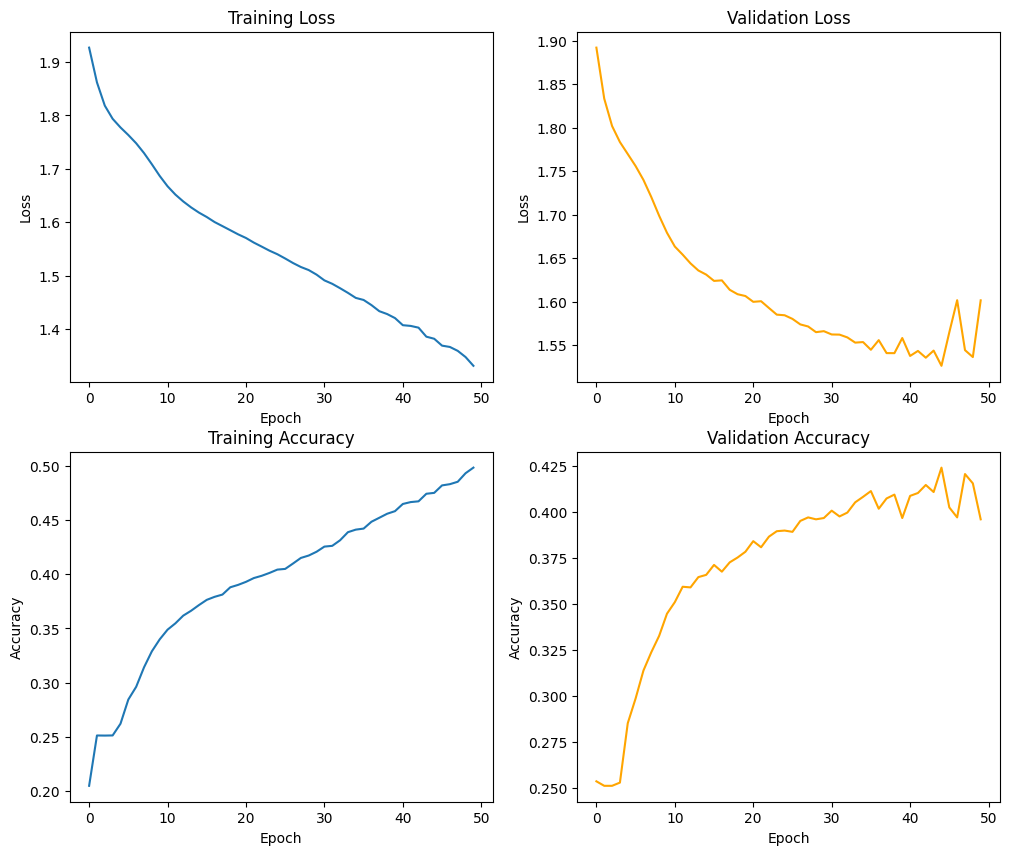

In [59]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel ='Epoch', ylabel = 'Loss')
ax[0, 0].set_title ('Training Loss')

ax[0, 1].plot (val_losses, 'orange')
ax[0, 1].set ( xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title ('Validation Loss')

ax[1, 0].plot ( train_accs )
ax[1, 0].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title ('Training Accuracy')

ax[1, 1].plot (val_accs, 'orange')
ax[1, 1].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title ('Validation Accuracy')

plt.show()

###Evaluate

In [60]:
test_target = []
test_predict = []
model.eval()

with torch.no_grad():
  for X_samples, y_samples in test_loader:
    X_samples = X_samples.to(device)
    y_samples = y_samples.to(device)
    outputs = model(X_samples)

    test_predict.append(outputs.cpu())
    test_target.append (y_samples.cpu())

test_predict = torch.cat(test_predict)
test_target = torch.cat(test_target)
test_acc = accuracy(test_target, test_predict)
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.4016439119531903
